In [ ]:
import pandas as pd
data = pd.read_csv("WC_AT.csv")
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


#Correlation

In [ ]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


<ipython-input-4-02f5ac3def62>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Waist'])


<Axes: xlabel='Waist', ylabel='Density'>

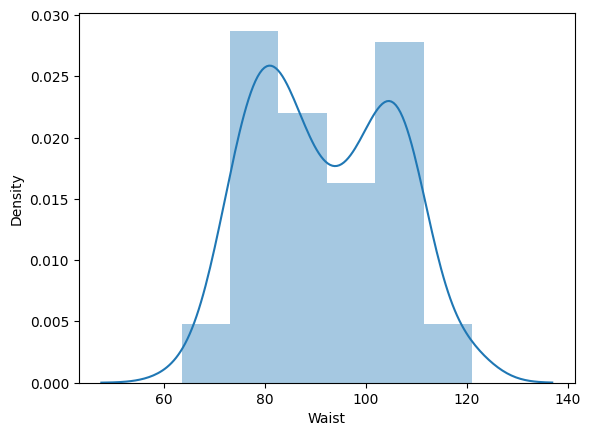

In [ ]:
import seaborn as sns
sns.distplot(data['Waist'])

<ipython-input-5-b0c2e94bb245>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AT'])


<Axes: xlabel='AT', ylabel='Density'>

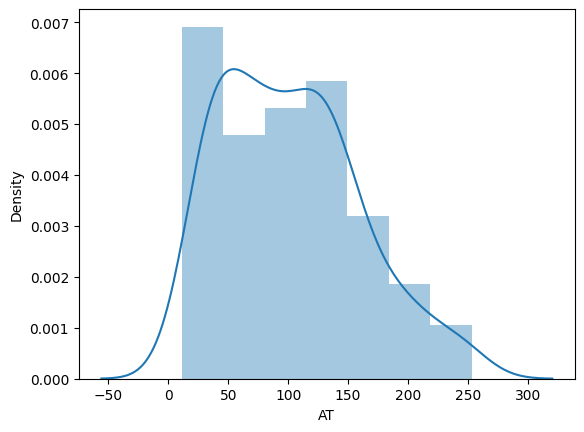

In [ ]:
sns.distplot(data['AT'])

#Fitting a linear regression model

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("AT~Waist", data=data).fit()

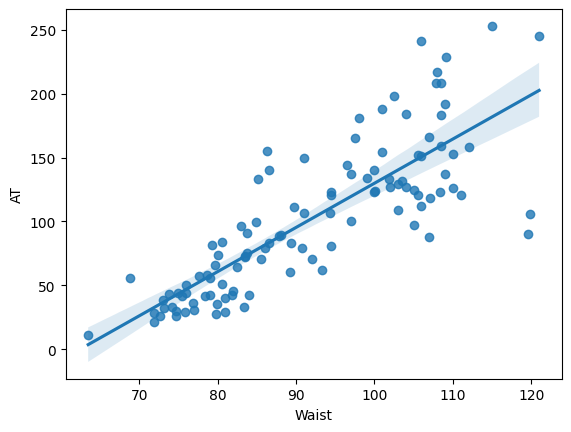

In [ ]:
sns.regplot(x='Waist', y='AT', data=data);

In [ ]:
#Coefficients
model.params

,0
Intercept,-215.981488
Waist,3.458859


In [ ]:
#t and p values
print(model.tvalues , "\n" , model.pvalues)


Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [ ]:
#R squared values
(model.rsquared)

0.670036893052843

#Predict for new data point

In [ ]:
newdata=pd.Series([65, 150, 40])
newdata

,0
0,65
1,150
2,40


In [ ]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])
data_pred

,Waist
0,65
1,150
2,40


In [ ]:
model.predict(data_pred)

,0
0,8.844373
1,302.847421
2,-77.627112


In [ ]:
data.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


range[mix,max]=[63,121]. since 150 and 40 are outside the range, the output values are abnormally high. So we must pick values within the range of the datatset.